#### Using SVD to compress images and still not lose its features ####

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy.linalg import svd   # Another module where SVD operator can be found

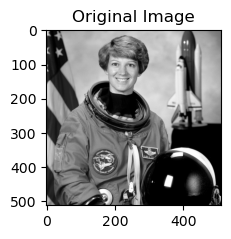

In [9]:
# Load a sample grayscale image
image = color.rgb2gray(data.astronaut())

# Perform SVD on the image
U, Sigma, Vt = svd(image, full_matrices=False)

# Plot original image
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.show()

In [10]:
print(f"How many singular values are there?: {Sigma.shape}")

How many singular values are there?: (512,)


In [11]:
# Function to reconstruct image using top k singular values
def reconstruct_image(U, Sigma, Vt, k):
    return np.dot(U[:, :k], np.dot(np.diag(Sigma[:k]), Vt[:k, :]))

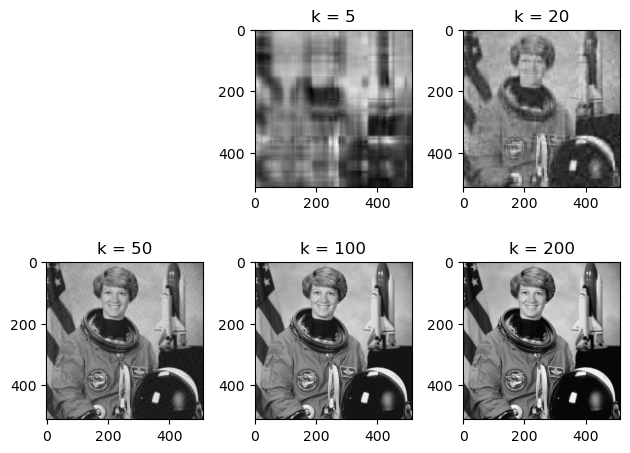

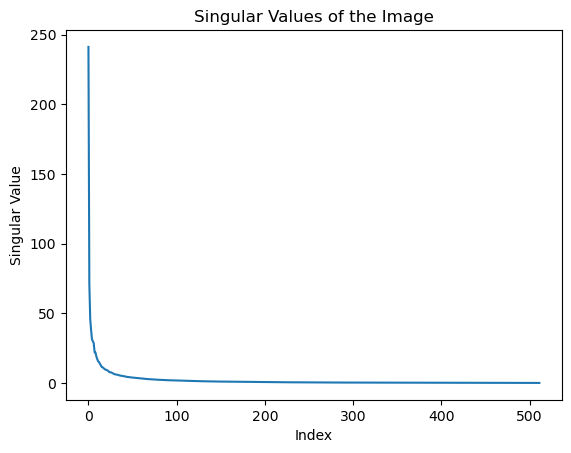

In [12]:
# Plot the compressed images using different numbers of singular values
ks = [5, 20, 50, 100, 200]
for i, k in enumerate(ks):
    compressed_image = reconstruct_image(U, Sigma, Vt, k)
    plt.subplot(2, 3, i+2)
    plt.title(f"k = {k}")
    plt.imshow(compressed_image, cmap='gray')

plt.tight_layout()
plt.show()

# Plot the singular values to understand information content
plt.plot(Sigma)
plt.title("Singular Values of the Image")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.show()

Unlike deep learning methods, SVD provides a clear mathematical interpretation of how each singular value and its corresponding vectors contribute to the image structure. This transparency allows us to visualize and explain how much information each component contributes to the final image.<br>
- Large singular values correspond to important structures in the image (like major edges or contrasts).
- Small singular values correspond to noise or less significant details (like fine textures).